In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load and clean the dataset

In [3]:
df = pd.read_csv('WHO/ledata.csv')
df = df.dropna()

del df['Country']
del df['Year']
del df['Status']

y = df['Life expectancy '].to_numpy()

del df['Life expectancy ']

A = df.to_numpy()

n_train = 1349

A_train = A[:1349,:]
y_train = y[:1349]

A_test = A[1349:,:]
y_test = y[1349:]

print(A_train.shape)


(1349, 18)


Data normalization

In [4]:

mA = A_train.mean(axis=0)
sA = A_train.std(axis=0)


A_train = (A_train-mA)/sA
A_test = (A_test-mA)/sA

m = y_train.mean()
y_train = y_train-m
y_test = y_test-m

Covariance Matrix

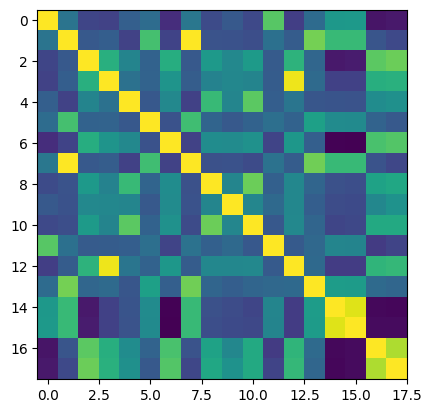

In [5]:


C = A_train.transpose().dot(A_train)
plt.imshow(C);

In [6]:
## Linear regression with Sklearn
from sklearn.linear_model import LinearRegression


reg = LinearRegression().fit(A_train, y_train)

print(reg.score(A_test, y_test))


0.8169224279499587


In [88]:
### Gradient descent

def grad_desc(A,y,eps=1e-2,lr = None,lamb= 0,verbose=0,itemax=170):
    X = np.zeros(A.shape[1])
    grad = np.array([1000]*A.shape[1])
    if lr == None:
        lr = 1/np.linalg.norm(A,2)**2   

    l_loss = []
    ite = 0
    while np.all(np.abs(grad) > eps) and ite<itemax:
        y_pred = A.dot(X)
        grad = np.dot(A.T,(y_pred-y))
        X = X - lr*grad + lamb*np.sum(np.square(X))
        l_loss.append((1/2*(y_pred-y)**2).mean())
        ite+=1

    if verbose == 1:
        plt.figure(1)
        plt.plot(l_loss)
        plt.show()
        
    return X,l_loss




In [8]:
def score(X_n,A,y): #return the oceff of determination
    y_pred= A@X_n
    return 1-(((y_pred-y)**2).sum())/(((y-y.mean())**2).sum())

def loss(X_n,A,y):
    return np.mean(1/2*np.square(A@X_n-y))

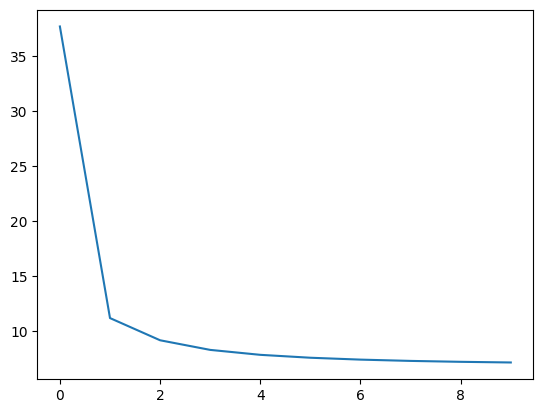

6.986599338436433


In [99]:
X,l_loss = grad_desc(A_train,y_train,eps=1,lamb=0.0023,verbose=1)

print(loss(X,A_test,y_test))

0.00012733341374613724


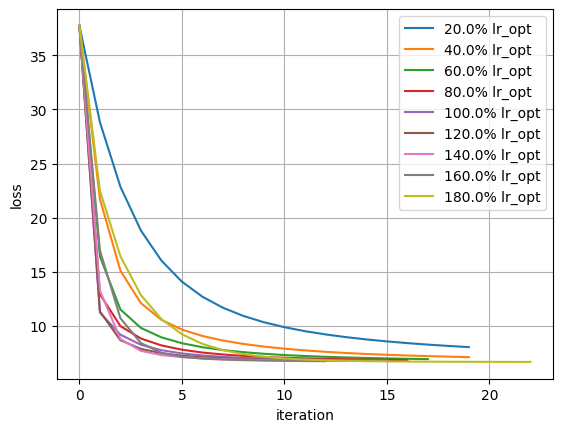

In [32]:
lr_opt = 1/np.linalg.norm(A_train,2)**2   
L_loss =[]
l_i = np.arange(-0.8,1,0.2)
for i in l_i:
    lr = lr_opt*(1+i)
    X_n,l_loss = grad_desc(A_train,y_train,eps=1e-2,lr=lr)
    L_loss.append(l_loss)
print(lr_opt)

plt.figure(1)
for k,l_loss in enumerate(L_loss):
    plt.plot(l_loss,label='{}% lr_opt'.format(100*round(1+l_i[k],2)))
plt.xlabel('iteration')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.show()